In [2]:
import numpy as np
import matplotlib as plt
import math

l'objectif est d'apprendre grâce à l'estimateur de maximum de vraisemblance les paramètres de lois normales à partir d'un ensemble de données

1. Préparation / visualisation

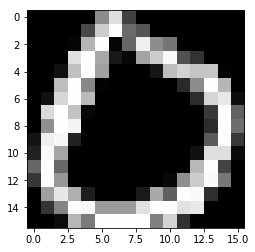

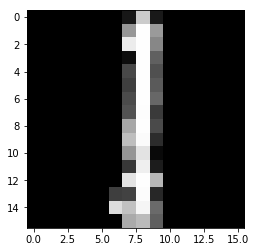

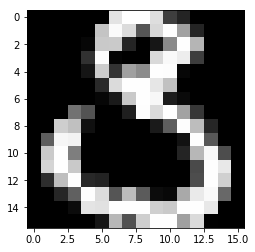

In [16]:
# -*- coding: utf-8 -*- 

import numpy as np
import matplotlib.pyplot as plt

def read_file ( filename ):
    """
    Lit un fichier USPS et renvoie un tableau de tableaux d'images.
    Chaque image est un tableau de nombres réels.
    Chaque tableau d'images contient des images de la même classe.
    Ainsi, T = read_file ( "fichier" ) est tel que T[0] est le tableau
    des images de la classe 0, T[1] contient celui des images de la classe 1,
    et ainsi de suite.
    """
    # lecture de l'en-tête
    infile = open ( filename, "r" )    
    nb_classes, nb_features = [ int( x ) for x in infile.readline().split() ]

    # creation de la structure de données pour sauver les images :
    # c'est un tableau de listes (1 par classe)
    data = np.empty ( 10, dtype=object )   
    filler = np.frompyfunc(lambda x: list(), 1, 1)
    filler( data, data )

    # lecture des images du fichier et tri, classe par classe
    for ligne in infile:
        champs = ligne.split ()
        if len ( champs ) == nb_features + 1:
            classe = int ( champs.pop ( 0 ) )
            data[classe].append ( list ( map ( lambda x: float(x), champs ) ) )
    infile.close ()

    # transformation des list en array
    output  = np.empty ( 10, dtype=object )
    filler2 = np.frompyfunc(lambda x: np.asarray (x), 1, 1)
    filler2 ( data, output )

    return output

def display_image ( X ):
    """
    Etant donné un tableau X de 256 flotants représentant une image de 16x16
    pixels, la fonction affiche cette image dans une fenêtre.
    """
    # on teste que le tableau contient bien 256 valeurs
    if X.size != 256:
        raise ValueError ( "Les images doivent être de 16x16 pixels" )

    # on crée une image pour imshow: chaque pixel est un tableau à 3 valeurs
    # (1 pour chaque canal R,G,B). Ces valeurs sont entre 0 et 1
    Y = X / X.max ()
    img = np.zeros ( ( Y.size, 3 ) )
    for i in range ( 3 ):
        img[:,i] = X

    # on indique que toutes les images sont de 16x16 pixels
    img.shape = (16,16,3)

    # affichage de l'image
    plt.imshow( img )
    plt.show ()
    
#test
output = read_file ("Data.txt")
display_image(output[0][0])
display_image(output[1][1])
display_image(output[3][3])

les chiffres sont appelés classes

2. Maximum de vraisemblance pour une classe
Dans ce TME, nous allons étudier la distribution de probabilité des teintes de gris des images (en fait, nous allons étudier sa fonction de densité car on travaille sur des variables aléatoires continues) . Nous allons faire l'hypothèse (certes un peu forte mais tellement pratique) que, dans chaque classe, les teintes des pixels sont mutuellement indépendantes. Autrement dit, si Xi, i=0,...,255, représente la variable aléatoire "intensité de gris du ième pixel", alors p(X0,…,X255) représente la fonction de densité des teintes de gris des images de la classe et:
p(X0,…,X255)=∏i=0255p(Xi).
Ainsi, en choisissant au hasard une image dans l'ensemble de toutes les images possibles de la classe, si celle-ci correspond au tableau np.array([x_0,...,x_255]), où les x_i sont des nombres réels compris entre 0 et 2, alors la valeur de la fonction de densité de l'image est égale à p(x_0,...,x_255) = ∏255i=0p(x_i).
Nous allons de plus supposer que chaque Xi suit une distribution normale de paramètres (μi,σ2i) (autrement dit, p(X_i) = N(μi,σ2i)). Par maximum de vraisemblance, estimez, pour une classe donnée, l'ensemble des paramètres (μ0,…,μ255) et (σ20,…,σ2255). Pour cela, écrivez une fonction learnML_class_parameters : float np.array np.array -> float np.array x float np.array qui, étant donné le tableau d'images d'une classe tel que retourné par la fonction read_file (autrement dit un tableau de tableaux de 256 nombres réels), renvoie un couple de tableaux, le premier élément du couple correspondant à l'ensemble des μi et le 2ème à l'ensemble des σ2i, i=0,...,255. C'est-à-dire que learnML_class_parameters ( classe ) renverra un objet similaire à :
( array ( [μ0,…,μ255] ), array ( [σ20,…,σ2255] ) )
Grâce à votre fonction learnML_class_parameters, vous pouvez verifier que:

étudier la distribution de probabilité des teintes de gris des images, étudier sa fonction de densité car on travaille sur des variables aléatoires continues 

In [50]:
def learnML_class_parameters ( training_data ):

    return  np.mean(training_data ,axis=0), np.var(training_data ,axis=0) #  var = mean(abs(x - x.mean())**2)

#teste 
i = 1
u,var = learnML_class_parameters ( output[i] )

In [5]:
t = np.array([2]*3)
tt = np.array([1]*3)
h = np.vstack((t,tt))

t = np.array([5]*3)
tt = np.array([8]*3)
hh = np.vstack((t,tt))

np.array((h,hh))

array([[[2, 2, 2],
        [1, 1, 1]],

       [[5, 5, 5],
        [8, 8, 8]]])

3. Maximum de vraisemblance pour toutes les classes


En utilisant la fonction de la question précédente, écrivez une fonction learnML_all_parameters : float np.array np.array np.array -> (float np.array x float np.array) list qui, étant donné le tableau training_data retourné par la fonction read_file (donc contenant toutes les images de toutes les classes), renvoie une liste de couples ( array ( [μ0,…,μ255] ), array ( [σ20,…,σ2255] ) ). Vous exécuterez cette fonction sur vos données d'apprentissage et sauvegarderez le résultat dans une variable parameters.

In [89]:
def learnML_all_parameters (training_data ):
    
    mu,var =  learnML_class_parameters ( training_data[0] ) 
        
    for i in range(1,len(training_data)):
        mu_tmp ,var_tmp =  learnML_class_parameters ( training_data[i] ) 
        mu = np.vstack((mu,mu_tmp))
        var = np.vstack((var,var_tmp))
        
    return np.array((mu, var))
        
#test
p = learnML_all_parameters(output)


4. Log-vraisemblance d'une image

Nous allons maintenant tester si, étant donné de nouvelles images, on peut classer celles-ci correctement, c'est-à-dire si on peut retrouver les chiffres auxquelles elles correspondent. Pour cela, nous allons utiliser de nouvelles images se trouvant dans le fichier 2015_tme3_usps_test.txt. Ce fichier a exactement le même format que celui d'apprentissage et peut donc être lu grâce à la fonction read_file. En particulier, pour chaque image, nous avons le chiffre auquel elle correspond, ce qui nous permettra de vérifier que notre classifieur fonctionne correctement. Téléchargez le fichier et lisez-le en utilisant read_file.
Ecrivez une fonction log_likelihood : float np.array x (float np.array,np.array) -> float qui, étant donné une image (donc un tableau de 256 nombres réels) et un couple ( array ( [μ0,…,μ255] ), array ( [σ20,…,σ2255] ) ), renvoie la log-vraisemblance qu'aurait l'image selon cet ensemble de μi et σi. Rappelez-vous que:




logp(x0,…,x255)=∑i=0255logp(xi)=∑i=0255[−12log(2πσ2i)−12(xi−μi)2σ2i]





Notez que le module math contient une constante math.pi. Attention: dans la liste parameters calculée dans la question précédente, pour certains pixels de certaines classes, la valeur de σ2 est égale à 0 (toutes les images de la base d'apprentissage avaient exactement la même valeur sur ce pixel). Dans ce cas, la vraisemblance de toute image sur ce pixel doit être de 1 (et donc sa log-vraisemblance doit être égale à 0).
Vous pourrez vérifier que vous obtenez les mêmes résultats que ci-dessous:

In [120]:
def log_likelihood ( output, mu ,var ) :
    s = 0
    
    for i in range(len(output ) ):
        if(var[i] == 0):
            s += 0
        else:
            s +=(-1/2)*np.log(2 * math.pi * var[i]) - 1/2 *  ((output[i] - mu[i]) **2  / var[i])
    return s
    
#teste
 
test_data = read_file ("d.txt")
log_likelihood ( test_data[2][3]  , p[0][1]  , p[1][1] )


-36631213.400524415

In [122]:
def log_likelihood_total(test_data,p):
    l = [ log_likelihood ( test_data, p[0][i],p[1][i] ) for i in range ( 10 ) ]
    return l
#test
log_likelihood_total(test_data [0][0],p)

[-80.594309481001218,
 -2030714328.0707991,
 -339.70961551873495,
 -373.97785273732529,
 -678.16479308314922,
 -364.62227994586954,
 -715.4508284953547,
 -344286.66839952325,
 -499.88159107145611,
 -35419.208662902507]

# 5. Log-vraisemblance d'une image (bis)

In [124]:
log_likelihood_total(test_data [1][5],p)

[-889.22508386992899,
 184.03163175636334,
 -185.29589128666683,
 -265.13424326432369,
 -149.54804687799918,
 -215.85994204347998,
 -94.869657118899056,
 -255.6077157467451,
 -118.95170104216609,
 -71.597002802343141]

# 6. Classification d'une image

Ecrivez une fonction classify_image : float np.array x (float np.array,np.array) list -> int qui, étant donné une image et l'ensemble de paramètres déterminés dans la question 3, renvoie la classe la plus probable de l'image, c'est-à-dire celle dont la log-vraisemblance est la plus grande.
Vous pourrez vérifier que vous obtenez les mêmes résultats que ci-dessous:

In [146]:

def classify_image( test_data, p ):
    l=log_likelihood_total(test_data,p)
    maxi =  max(l)

    for i in range(len(l)):
            if l[i]==maxi:
                indice= i
      
    return indice,maxi  
#test
classify_image( test_data[1][5], p)

(1, 184.03163175636334)

In [147]:
classify_image( test_data[4][1], p)

(9, -116.7239547174069)